In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.head()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,NaN,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4


In [5]:
train.shape

(2390491, 138)

In [6]:
len(train.date.unique())
#Shows the amount of days this data is based off of, which is 500 days worth of trading

500

In [7]:
trade_frequency = train.groupby(['date'])['ts_id'].count()
#Gets the count of how many trades are made each day

<function matplotlib.pyplot.show(*args, **kw)>

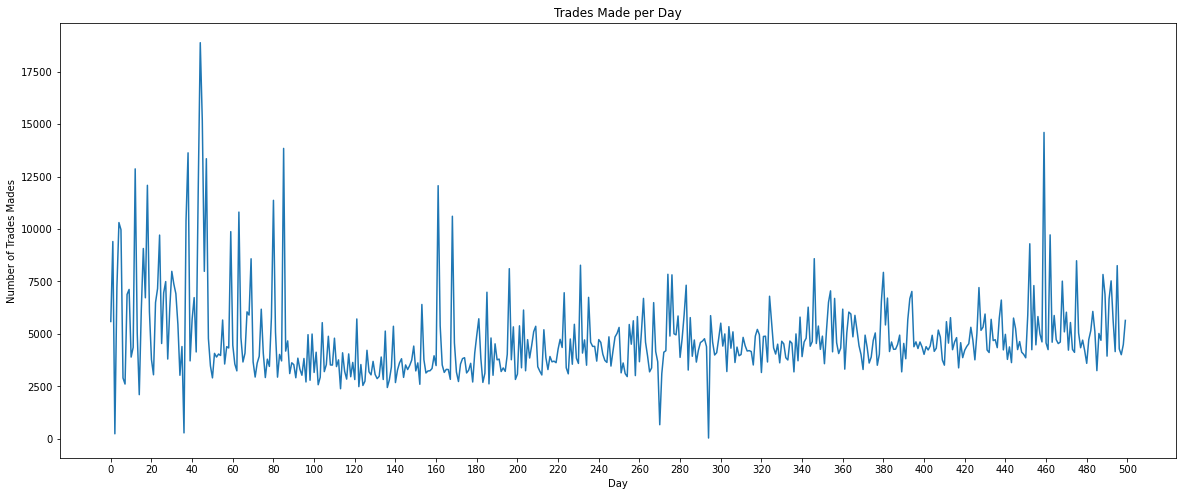

In [8]:
plt.figure(figsize =(20, 8))
plt.plot(trade_frequency)
plt.title('Trades Made per Day')
plt.xlabel('Day')
plt.ylabel('Number of Trades Mades')
x_ticks = [x for x in range(0, 501, 20)]
plt.xticks(x_ticks)
plt.show
#This is a plot of how many trades are made per day, as can be seen most days have a trade freqency of around 5000 
#although there are some extreme outliers, especially in the first 90 days or so
#May help machine learning if the first 90 days are removed as the volitality of the market seems to be very high

In [9]:
print('Max Weight ', train.weight.max())
print('Min Weight ', train.weight.min())
print('Median Weight ', train.weight.median())
print('Mean Weight ', train.weight.mean())
print('Trades Made with Zero weight', train.loc[train.weight == 0]['weight'].count())
print('Trades Made with Nonzero weight', train.loc[train.weight != 0]['weight'].count())
#For training of model might want to remove zero weight trades as they do not contribute to scoring

Max Weight  167.2937151011765
Min Weight  0.0
Median Weight  0.7086769723734838
Mean Weight  3.031535210529374
Trades Made with Zero weight 409204
Trades Made with Nonzero weight 1981287


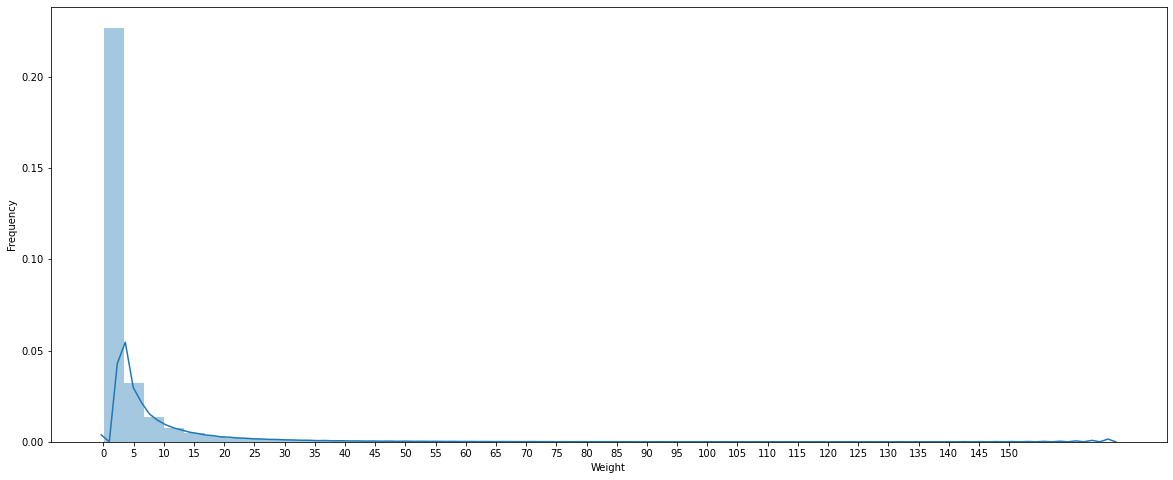

In [10]:
plt.figure(figsize =(20, 8))
sns.distplot(train.loc[train.weight != 0]['weight'])
plt.ylabel('Frequency')
plt.xlabel('Weight')
x_ticks = [x for x in range(0, 151, 5)]
plt.xticks(x_ticks)
plt.show()
#Most trades seem to be below 20 weight, with some notable outliers

In [11]:
print(train.feature_0.unique())
#From doing a little research this variable seems to tell which way the trade is happening,
#May want to remove from model for training

[ 1 -1]


In [12]:
print('Max Resp ', train.resp.max())
print('Min Resp ', train.resp.min())
print('Median Resp ', train.resp.median())
print('Mean Resp ', train.resp.mean())
#Seems most return values are centered around 0
#The distribution of which can be seen below, seems to have normal distribution around 0

Max Resp  0.4484615812436584
Min Resp  -0.5493844963458359
Median Resp  8.634996629657514e-05
Mean Resp  0.00040831128805424865


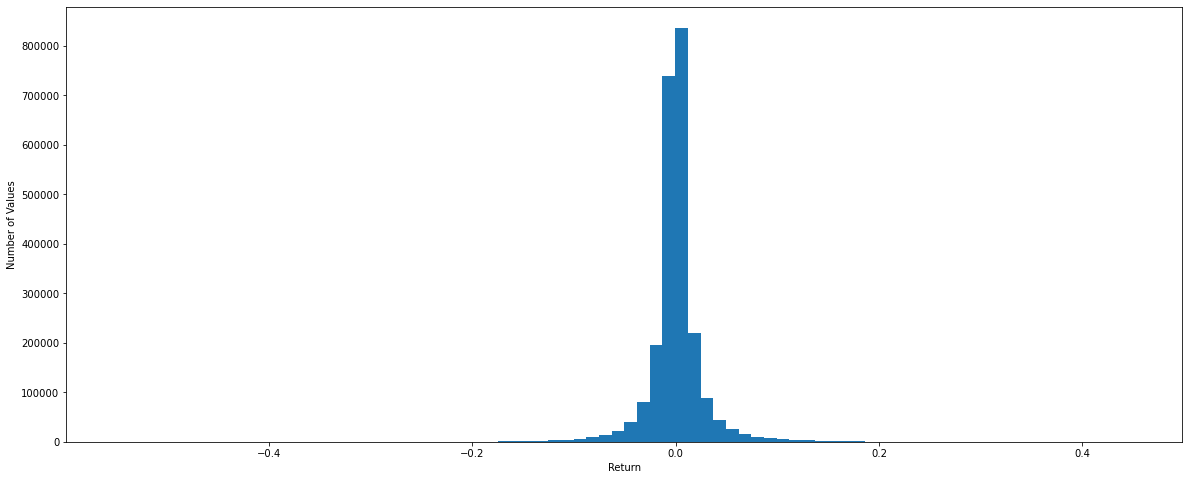

In [13]:
plt.figure(figsize =(20, 8))
plt.hist(train.resp, bins = 80)
plt.xlabel('Return')
plt.ylabel('Number of Values')
plt.show()

In [15]:
return_by_day = train.groupby(['date']).resp.mean()
#gives the average return for each day

<function matplotlib.pyplot.show(*args, **kw)>

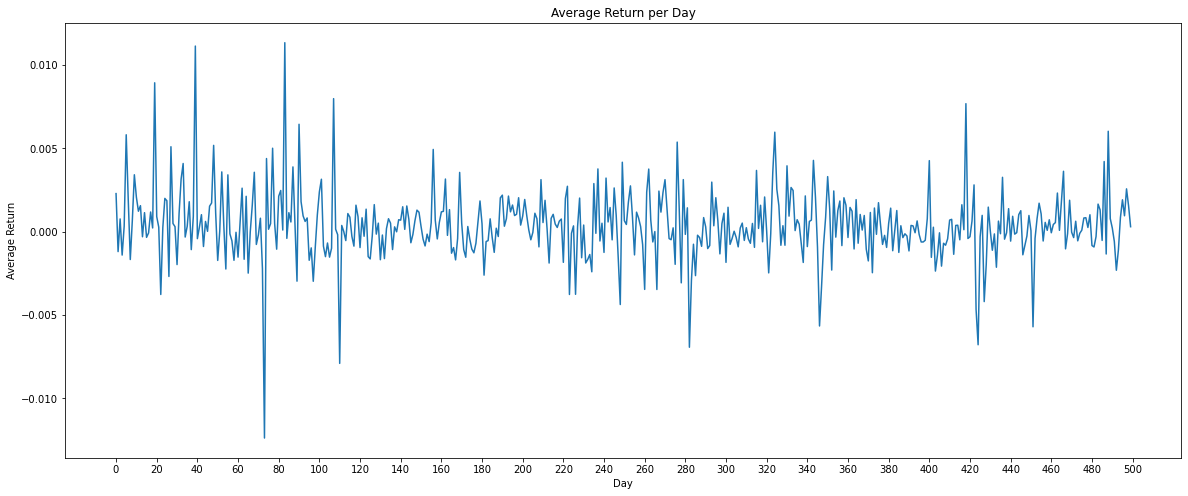

In [17]:
plt.figure(figsize =(20, 8))
plt.plot(return_by_day)
plt.title('Average Return per Day')
plt.xlabel('Day')
plt.ylabel('Average Return')
x_ticks = [x for x in range(0, 501, 20)]
plt.xticks(x_ticks)
plt.show
#centered around 0 as expected. some very large fluctionations in the first 90 days, likely denoting high market volatility. 
#This leads me to beleive removing the first 90 days may improve model performance.